In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_diabetes

In [11]:
X,y = load_diabetes(return_X_y=True,as_frame=True)

In [12]:
X.shape

(442, 10)

In [13]:
y.shape

(442,)

In [16]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [15]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [18]:
# check any null value is there
X.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [20]:
# train test split
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((296, 10), (146, 10), (296,), (146,))

In [23]:
# model training
from sklearn.tree import DecisionTreeRegressor

In [24]:
treeRegressor = DecisionTreeRegressor()

In [25]:
treeRegressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [27]:
y_pred = treeRegressor.predict(X_test)

In [30]:
# score and classification report
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [32]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

-0.17331144859858805
6752.712328767123
65.0958904109589


### this is overfited model lets do prepunign 

In [34]:
param_grid = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,5,10,15,20,30],
    'max_features':['sqrt','log2']
}

In [35]:
from sklearn.model_selection import GridSearchCV

In [44]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=param_grid,scoring='neg_mean_squared_error',verbose=2,cv=5,n_jobs=-1)

In [45]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 5, 10, 15, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=2)

In [46]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [52]:
grid.scorer_

make_scorer(mean_squared_error, greater_is_better=False, response_method='predict')

In [48]:
y_pred = grid.predict(X_test)

In [49]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.3570213145747533
3700.509443925975
49.074512809799344


## visulize the tree

In [54]:
model = DecisionTreeRegressor(criterion='friedman_mse',max_depth=2,max_features='sqrt',splitter='best')

In [55]:
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                      max_features='sqrt')

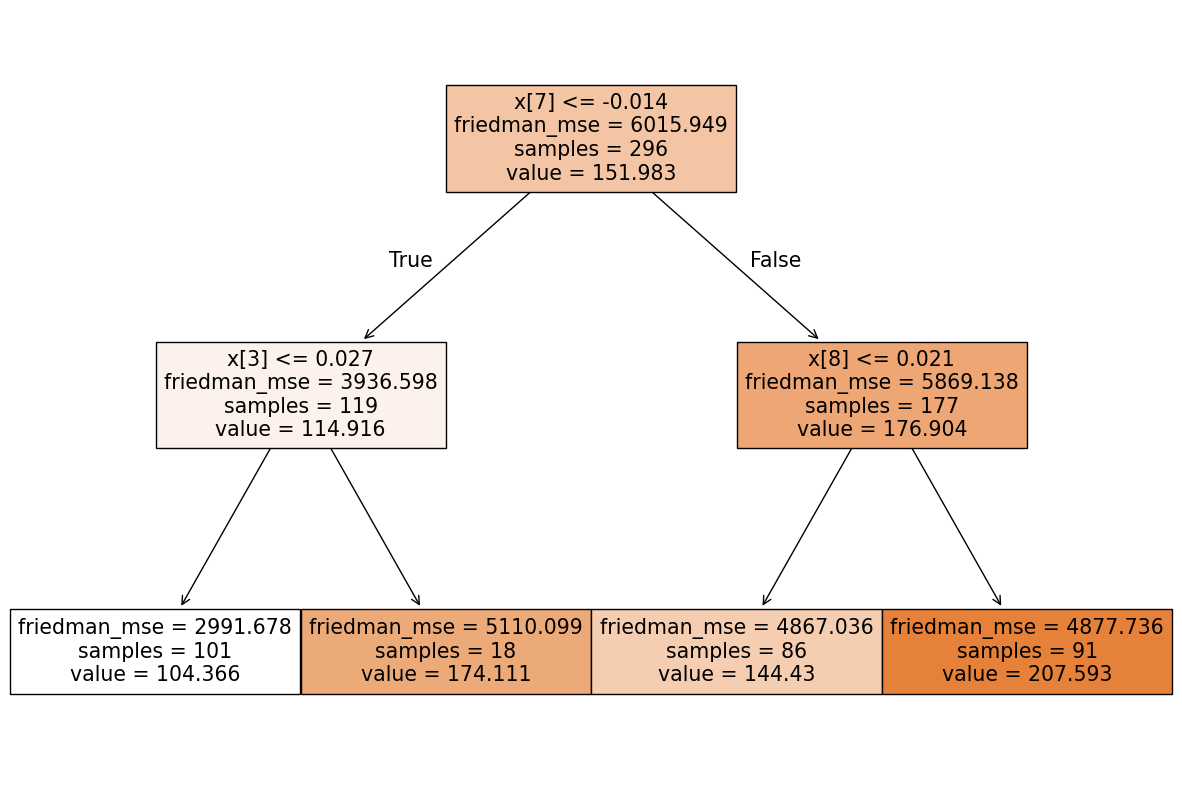

In [58]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()